# Asari table preprocessing

In [2]:
# !pip install seaborn

In [22]:
import pandas as pd
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from random import randrange

In [23]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [24]:
asari_out_fdr = "../../../asari-output-RPneg/output_asari_project_32322133_wtStemCell//"
metadata_file = "../../../seq/RPneg_addgrp_wtStemCell.csv"
mode = "RPneg"
group_percNA_threshold = 0.3 # < percNA, should be presented in any group
rm_samples = ['Tn_750K_3', 'Tn_750K_4']

In [25]:
output_dir = "../../output/preproc_fultab_wt_stemCell" + str(randrange(0,100))

In [26]:
try:
    os.mkdir(output_dir)
except:
    print("not done")

In [27]:
feat_df = pd.read_csv(os.path.join(asari_out_fdr,'export/full_Feature_table.tsv'),sep = '\t')

In [28]:
feat_df.head()

,id_number,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,MT_20230308_032,Blank_20230308_002,Blank_20230308_004,Blank_20230308_006,Blank_std_20230308_1_002,MT_20230308_002,MT_20230308_004,MT_20230308_006,MT_20230308_008,MT_20230308_010,MT_20230308_012,MT_20230308_014,MT_20230308_016,MT_20230308_018,MT_20230308_020,MT_20230308_022,MT_20230308_024,MT_20230308_026,MT_20230308_028,MT_20230308_030,WT_Klof2_C1_pooled_02,WT_Klof2_C1_pooled_04,WT_Klof2_C1_pooled_06
0,F1,100.9334,21.61,19.92,24.16,1,2092948,0.03,0.93,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1935510,1154777,771318
1,F2,417.0238,31.14,28.75,33.51,625,1872502,1.00,0.97,9,2,0,0,0,0,0,0,0,0,0,0,1018472,0,0,0,0,0,588884,0,0,0,0,0,0
2,F3,417.0360,20.78,18.64,23.29,626,83870590,1.00,0.87,2479,16,16568160,0,0,0,0,16715971,17121711,3274770,1147107,929394,4321287,4923625,4235536,2278060,3153499,3491983,1715865,2483791,1925091,3148828,0,0,0
3,F4,113.0139,19.70,17.06,22.24,12,35797610,1.00,0.94,61,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18939390,18710423,18048458
4,F5,452.2853,33.09,30.49,35.45,1214,5313362,1.00,0.92,212,4,0,0,0,0,0,0,0,0,1545347,1002182,0,0,414947,0,0,0,1929205,0,0,0,0,0,0


In [29]:
print(f'number of features are: {feat_df.shape[0]}')

number of features are: 18094


In [30]:
meta_df = pd.read_csv(metadata_file, header = 0)

In [31]:
meta_df

,Sample Type,File Name,Sample ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument Method,Process Method,Position,Inj Vol
0,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A1,2
1,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A1,2
2,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,NR,Blank_std,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A2,2
3,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A3,2
4,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A3,2
5,Unknown,MT_20230308_006,pooledsample_02,pooled_1,NaN,pooled,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A4,5
6,Unknown,MT_20230308_008,Naive_250k_01_02,Tn_250K_1,250000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B1,5
7,Unknown,MT_20230308_010,Naive_250k_02_02,Tn_250K_2,250000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B2,5
8,Unknown,MT_20230308_012,Naive_750k_01_02,Tn_750K_3,750000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B3,5
9,Unknown,MT_20230308_014,Naive_750k_02_02,Tn_750K_4,750000,Tn,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:B4,5


In [32]:
name_dict = {row['File Name']:row['Sample_ID_upd'] for i, row in meta_df.iterrows() }

In [33]:
feat_df.columns = [name_dict[x] if x in name_dict else x for x in feat_df.columns]

In [34]:
feat_df.columns

Index(['id_number', 'mz', 'rtime', 'rtime_left_base', 'rtime_right_base', 'parent_masstrack_id', 'peak_area', 'cSelectivity', 'goodness_fitting', 'snr', 'detection_counts', 'Qstd_3', 'Blank_1', 'Blank_2', 'Blank_3', 'Blank_std_1', 'Qstd_1', 'Qstd_2', 'pooled_1', 'Tn_250K_1', 'Tn_250K_2', 'Tn_750K_3', 'Tn_750K_4', 'CD8stem_250K_1', 'CD8stem_300K_2', 'pooled_2', 'CD8trans_350K_1', 'CD8trans_250K_2', 'CD8TD_750K_1', 'CD8TD_750K_2', 'pooled_3', 'Klof2_1', 'Klof2_2', 'Klof2_3'], dtype='object')

In [35]:
end_index = 11

In [36]:
feat_df.iloc[:,end_index-2:end_index +2].columns

Index(['snr', 'detection_counts', 'Qstd_3', 'Blank_1'], dtype='object')

In [37]:
meta_df['Sample_ID_upd'].tolist()

['Blank_1',
 'Blank_2',
 'Blank_std_1',
 'Qstd_1',
 'Qstd_2',
 'pooled_1',
 'Tn_250K_1',
 'Tn_250K_2',
 'Tn_750K_3',
 'Tn_750K_4',
 'CD8stem_250K_1',
 'CD8stem_300K_2',
 'pooled_2',
 'CD8trans_350K_1',
 'CD8trans_250K_2',
 'CD8TD_750K_1',
 'CD8TD_750K_2',
 'pooled_3',
 'Qstd_3',
 'Blank_3',
 'Klof2_1',
 'Klof2_2',
 'Klof2_3']

In [38]:
new_col = feat_df.columns[0:end_index].tolist() + meta_df['Sample_ID_upd'].tolist()

In [39]:
reord_feat_df = feat_df[new_col]

# remove samples if necessary

In [40]:
if len(rm_samples) > 0:
    reord_feat_df = reord_feat_df.drop(rm_samples, axis = 1)  # rm_samples = ['Tn_750K_3', 'Tn_750K_4']

In [41]:
reord_feat_df

,id_number,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,Blank_1,Blank_2,Blank_std_1,Qstd_1,Qstd_2,pooled_1,Tn_250K_1,Tn_250K_2,CD8stem_250K_1,CD8stem_300K_2,pooled_2,CD8trans_350K_1,CD8trans_250K_2,CD8TD_750K_1,CD8TD_750K_2,pooled_3,Qstd_3,Blank_3,Klof2_1,Klof2_2,Klof2_3
0,F1,100.9334,21.61,19.92,24.16,1,2092948,0.03,0.93,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1935510,1154777,771318
1,F2,417.0238,31.14,28.75,33.51,625,1872502,1.00,0.97,9,2,0,0,0,0,0,0,0,0,0,0,0,0,588884,0,0,0,0,0,0,0,0
2,F3,417.0360,20.78,18.64,23.29,626,83870590,1.00,0.87,2479,16,0,0,0,16715971,17121711,3274770,1147107,929394,4235536,2278060,3153499,3491983,1715865,2483791,1925091,3148828,16568160,0,0,0,0
3,F4,113.0139,19.70,17.06,22.24,12,35797610,1.00,0.94,61,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18939390,18710423,18048458
4,F5,452.2853,33.09,30.49,35.45,1214,5313362,1.00,0.92,212,4,0,0,0,0,0,0,1545347,1002182,414947,0,0,0,1929205,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18089,F18090,862.5595,272.26,270.40,274.74,7618,10852995,1.00,0.83,131,3,0,0,0,0,5697069,0,0,0,0,0,0,0,0,0,0,0,5095800,0,0,0,102276
18090,F18091,862.5595,280.93,278.45,283.43,7618,10391517,0.85,0.95,117,3,0,0,0,0,3810189,0,0,0,0,0,0,0,0,0,0,0,4284955,0,0,0,2209482
18091,F18092,862.6082,270.82,268.34,273.29,7619,60888843,1.00,0.97,206,3,0,0,0,19863111,20084621,0,0,0,0,0,0,0,0,0,0,0,20966111,0,0,0,0
18092,F18093,862.7874,539.97,537.35,542.58,7624,17459951,0.86,0.99,24,3,0,0,0,5909251,5862557,0,0,0,0,0,0,0,0,0,0,0,5779198,0,0,0,0


#### export the renamed feature table without any normalizations...

In [42]:
reord_feat_df.to_csv(os.path.join(output_dir,"renamed_full_feature_table.csv"),index = False)

------

------

#### Since this is a small experiment
- I have modified the metadata accordingly, no need for doing this in the later sections`m

In [43]:
def extract_list2list(regExpr,a_list):
    return([re.search(regExpr,x)[0] for x in a_list if re.search(regExpr,x)])

def extract_list2dict(regExpr,a_list):
    return({x:re.search(regExpr,x)[0] for x in a_list if re.search(regExpr,x)})

---------

## Preprocess the asari table 
- Separate metainfo_df & data_df; convert zero to np.nan

In [44]:
reord_feat_df.index = reord_feat_df['id_number']

In [45]:
data_df = reord_feat_df.iloc[:,end_index:]

In [46]:
data_df.head()

,Blank_1,Blank_2,Blank_std_1,Qstd_1,Qstd_2,pooled_1,Tn_250K_1,Tn_250K_2,CD8stem_250K_1,CD8stem_300K_2,pooled_2,CD8trans_350K_1,CD8trans_250K_2,CD8TD_750K_1,CD8TD_750K_2,pooled_3,Qstd_3,Blank_3,Klof2_1,Klof2_2,Klof2_3
id_number,,,,,,,,,,,,,,,,,,,,,
F1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1935510,1154777,771318
F2,0,0,0,0,0,0,0,0,0,0,0,0,588884,0,0,0,0,0,0,0,0
F3,0,0,0,16715971,17121711,3274770,1147107,929394,4235536,2278060,3153499,3491983,1715865,2483791,1925091,3148828,16568160,0,0,0,0
F4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18939390,18710423,18048458
F5,0,0,0,0,0,0,1545347,1002182,414947,0,0,0,1929205,0,0,0,0,0,0,0,0


In [47]:
metainfo_df = reord_feat_df.iloc[:,0:end_index]

In [48]:
# turn all zero to NA for easy manipulation later
data_df[data_df == 0 ] = np.nan

---

-----

## Sample present reporting

### functions

In [49]:
import warnings
def select_column_regExpr(feat_df,regPattern):
    res_df = feat_df.loc[:,[x for x in feat_df.columns \
                            if re.search(regPattern,x)]]
    return(res_df)

def report_basic_stat(df):
    '''
    Default calculate mean, min & maximum and percentage of NA for any table.
    Before inputting the table, filtering steps may need to be done like correlation of blank matrix and filter out samples.
    '''
    if any(df == 0):
        df[df == 0] = np.nan
    
    # Use warnings.catch_warnings() to filter out warnings in this block
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        mean_list = df.apply(lambda x: np.nanmean(x), axis=1)
    
        med_list = df.apply(lambda x: x.median(skipna=True), axis=1)
        max_list = df.apply(lambda x: x.max(skipna=True), axis=1)
        min_list = df.apply(lambda x: x.max(skipna=True), axis=1)

        percNA_list = df.apply(lambda x: x.isna()).sum(axis=1) / df.shape[1]

        cv_list = []
        for i,row in df.iterrows():
            if all(np.isnan(row)):
                cv_list.append(np.nan)
            else:
                cv_list.append(row.std(skipna=True) / row.mean(skipna=True))
        
        df_stat_df1 = pd.DataFrame({
            'percNA': percNA_list, 
            'mean': mean_list,
            'median': med_list,
            'max': max_list,
            'min': min_list,
            'cv': cv_list
        })
        df_dict = df_stat_df1.to_dict('index')
    return df_dict


def select_and_report(feat_df,regPattern):
    sel_df = select_column_regExpr(feat_df,regPattern)
    rep_dict = report_basic_stat(sel_df)
    return(rep_dict)

def dicts2table(dict_of_dict):
    new_df = pd.DataFrame()
    for k,v in dict_of_dict.items():
        tab = pd.DataFrame(v).transpose()
        tab.columns = [k + "_" + x for x in tab.columns]
        new_df =  pd.concat([new_df, tab], axis=1)
    return(new_df)

### Blank stat reporting

In [50]:
blank_df = select_column_regExpr(data_df,'Blank')

<Axes: >

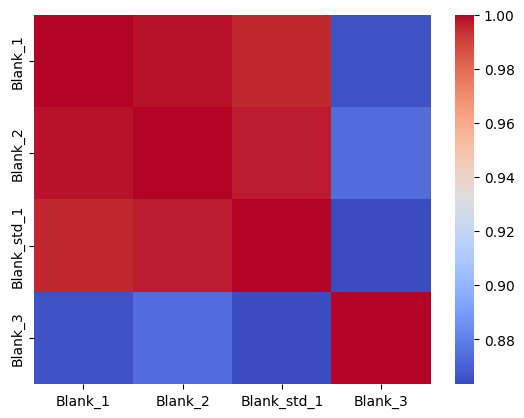

In [51]:
# quickly check if blank needs to be removed
# Note that for drawing this, it will be better to not convert 0 to NA
sns.heatmap(blank_df.corr(), cmap="coolwarm")

##### sample of `003` is very different (and it is the end, so might have more overflow), drop that for blank masking

<Axes: >

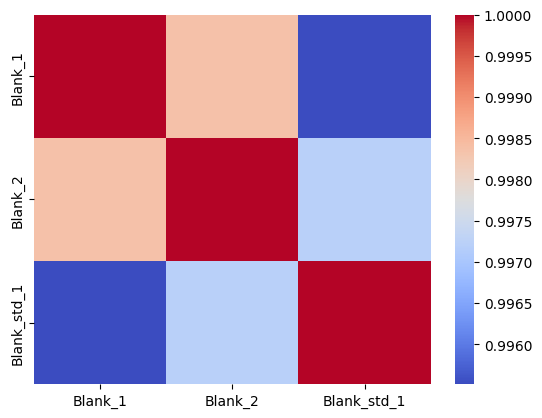

In [53]:
blank_df = select_column_regExpr(data_df,'Blank\_[(1-2)|std]+') # ignore 001
sns.heatmap(blank_df.corr(), cmap="coolwarm")

In [54]:
print(blank_df.columns)
blank_dict = report_basic_stat(blank_df)

Index(['Blank_1', 'Blank_2', 'Blank_std_1'], dtype='object')


In [55]:
sample_df = data_df.loc[:,[x for x in data_df.columns if re.search("CD8stem|Tn|CD8TD|CD8trans",x)]]
print(sample_df.columns)
sample_dict = report_basic_stat(sample_df)

Index(['Tn_250K_1', 'Tn_250K_2', 'CD8stem_250K_1', 'CD8stem_300K_2', 'CD8trans_350K_1', 'CD8trans_250K_2', 'CD8TD_750K_1', 'CD8TD_750K_2'], dtype='object')


In [56]:
# get the NA percentage of blank and samples
dict_of_dict = {'blank':blank_dict,
                'sample':sample_dict,
}

stat_df1 = dicts2table(dict_of_dict)
stat_df1.head(5) # the statistical table reporting NA was named stat_df1

,blank_percNA,blank_mean,blank_median,blank_max,blank_min,blank_cv,sample_percNA,sample_mean,sample_median,sample_max,sample_min,sample_cv
F1,1.0,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN
F2,1.0,NaN,NaN,NaN,NaN,NaN,0.875,588884.000,588884.0,588884.0,588884.0,NaN
F3,1.0,NaN,NaN,NaN,NaN,NaN,0.000,2275853.375,2101575.5,4235536.0,4235536.0,0.495068
F4,1.0,NaN,NaN,NaN,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN
F5,1.0,NaN,NaN,NaN,NaN,NaN,0.500,1222920.250,1273764.5,1929205.0,1929205.0,0.539184


### Blank masking

In [57]:
def blank_masking_soft(feat_df,
                  stat_df,
                  blank_percNA_threshold = 1, # no percentage filtering
                  samples2blank_ratio = 3):
    new_stat_df = stat_df.loc[((stat_df['blank_percNA'] < blank_percNA_threshold) & 
                              (stat_df['sample_max'] > stat_df['blank_max']*samples2blank_ratio))| # using maximum
                              (stat_df['blank_percNA'] >= blank_percNA_threshold),:] # IF Percentage of NA in blank dataframes exceeds certain levels, 
    new_feat_df = feat_df.loc[new_stat_df.index,]
    return(new_feat_df,new_stat_df)

In [58]:
blankMasked_data_df,blankMasked_stat_df = blank_masking_soft(data_df,
                                                               stat_df1, 
                                                               blank_percNA_threshold = 1, 
                                                               samples2blank_ratio = 2)

In [59]:
blankMasked_data_df.shape

(14616, 21)

In [60]:
blankMasked_data_df.head()

,Blank_1,Blank_2,Blank_std_1,Qstd_1,Qstd_2,pooled_1,Tn_250K_1,Tn_250K_2,CD8stem_250K_1,CD8stem_300K_2,pooled_2,CD8trans_350K_1,CD8trans_250K_2,CD8TD_750K_1,CD8TD_750K_2,pooled_3,Qstd_3,Blank_3,Klof2_1,Klof2_2,Klof2_3
F1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1935510.0,1154777.0,771318.0
F2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,588884.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F3,NaN,NaN,NaN,16715971.0,17121711.0,3274770.0,1147107.0,929394.0,4235536.0,2278060.0,3153499.0,3491983.0,1715865.0,2483791.0,1925091.0,3148828.0,16568160.0,NaN,NaN,NaN,NaN
F4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18939390.0,18710423.0,18048458.0
F5,NaN,NaN,NaN,NaN,NaN,NaN,1545347.0,1002182.0,414947.0,NaN,NaN,NaN,1929205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
print(f"Before filtering, there are {data_df.shape[0]} number of features\n \
after blank masking, there are {blankMasked_data_df.shape[0]} number of features\n")

Before filtering, there are 18094 number of features
 after blank masking, there are 14616 number of features



In [62]:
blankMasked_data_df.to_csv(
    os.path.join(output_dir,
                    f"blankM_{mode}_fulFeatab.csv"),index = True)

### perform sample present report

In [67]:
Tn_dict = select_and_report(blankMasked_data_df,'Tn')
CD8stem_dict = select_and_report(blankMasked_data_df,'CD8stem')
CD8trans_dict = select_and_report(blankMasked_data_df,'CD8trans')
CD8TD_dict = select_and_report(blankMasked_data_df,'CD8TD')
Stem_dict = select_and_report(blankMasked_data_df,'Klof2') # 

In [68]:
dict_of_dict = {'Tn': Tn_dict,
                'CD8stem': CD8stem_dict,
                'CD8trans': CD8trans_dict,
                'CD8TD': CD8TD_dict,
                'Klof2': Stem_dict #
}

In [69]:
stat_df2 = dicts2table(dict_of_dict)

------

## add stat into feature table and rearrange sample order

In [70]:
metainfo_df.columns

Index(['id_number', 'mz', 'rtime', 'rtime_left_base', 'rtime_right_base', 'parent_masstrack_id', 'peak_area', 'cSelectivity', 'goodness_fitting', 'snr', 'detection_counts'], dtype='object')

In [71]:
data_df.columns

Index(['Blank_1', 'Blank_2', 'Blank_std_1', 'Qstd_1', 'Qstd_2', 'pooled_1', 'Tn_250K_1', 'Tn_250K_2', 'CD8stem_250K_1', 'CD8stem_300K_2', 'pooled_2', 'CD8trans_350K_1', 'CD8trans_250K_2', 'CD8TD_750K_1', 'CD8TD_750K_2', 'pooled_3', 'Qstd_3', 'Blank_3', 'Klof2_1', 'Klof2_2', 'Klof2_3'], dtype='object')

In [72]:
def group_filtering(feat_df,
                    stat_df,
                    group_percNA_threshold = group_percNA_threshold,
                    group_signature = ['R5pos','R5neg','Naive'], # the group you would like to do filtering
                    percNA_suffix_inRegExpr = '\\_percNA'):
    '''
    Perform group filtering
    
    '''
    group_percNA_df = select_column_regExpr(stat_df,('|').join([x + percNA_suffix_inRegExpr \
                                                                            for x in group_signature]))
    group_percNA_df_filtered = group_percNA_df.loc[group_percNA_df.apply(lambda x: x < group_percNA_threshold,
                                                                         axis =1).any(axis = 1),
                                                   :]
    new_stat_df = stat_df.loc[group_percNA_df_filtered.index,:]
    new_feat_df = feat_df.loc[group_percNA_df_filtered.index,:]
    
    return(new_feat_df,new_stat_df)

In [73]:
grp_filt_df, grp_filt_stat_df = group_filtering(feat_df = blankMasked_data_df,
                                                stat_df = stat_df2,
                                                group_percNA_threshold = group_percNA_threshold,
                                                group_signature = ['Tn','CD8stem','CD8trans','CD8TD','^pooled'],
                                                percNA_suffix_inRegExpr = '\\_percNA')

In [74]:
grp_filt_stat_df.shape

(8862, 30)

In [75]:
# so basically, when doing group filtering, the blank masking is useless :/. but good to check
len(grp_filt_stat_df.index.intersection(blankMasked_stat_df.index))

8862

In [76]:
print(f"Before filtering, there are {blankMasked_data_df.shape[0]} number of features\n \
finally after group filtering, there are {grp_filt_df.shape[0]} number of features")

Before filtering, there are 14616 number of features
 finally after group filtering, there are 8862 number of features


In [77]:
def combine_tables(list_df = [metainfo_df,grp_filt_stat_df,grp_filt_df],
                key_index_df = grp_filt_stat_df):
    index = key_index_df.index
    new_list_df = []
    for df in list_df:
        new_list_df.append(df.loc[index,:])
    merge_df = pd.concat(new_list_df,axis =1)
    return(merge_df)

In [78]:
m_df = combine_tables(list_df = [metainfo_df,grp_filt_stat_df,grp_filt_df],  # the order of df directly afffects the order of the columns
                    key_index_df = grp_filt_stat_df)

In [79]:
m_df.to_csv(
    os.path.join(output_dir,
                   f"groupFil{group_percNA_threshold}_{mode}_blkM_featab.csv"),index = False)

grp_filt_stat_df.to_csv(
    os.path.join(output_dir,
                   f"groupFil{group_percNA_threshold}_{mode}_blkM_stattab.csv"))

---

---

---

## Filtering samples based on QC report (if needed)

In [80]:
# # No outliers identified in this analysis, thus the outliers list is empty
# outliers = []

# def dropSamples(feat_df,dropSampleList):
#     fil_feat_df = feat_df.drop(dropSampleList, axis = 1)
#     return(fil_feat_df)

# if outliers:
#     outDrop_grp_filt_df = dropSamples(grp_filt_df, outliers)
#     outDrop_grp_filt_df.to_csv(
#         os.path.join(output_dir,
#                        f"outDrop_blankM_groupFil{group_percNA_threshold}_{mode}_featab.csv"),index = False)
# else:
#     outDrop_grp_filt_df = m_df

-----

-----

-----

## TIC normalization for top 1000 features

In [81]:
grp_filt_df.head()

,Blank_1,Blank_2,Blank_std_1,Qstd_1,Qstd_2,pooled_1,Tn_250K_1,Tn_250K_2,CD8stem_250K_1,CD8stem_300K_2,pooled_2,CD8trans_350K_1,CD8trans_250K_2,CD8TD_750K_1,CD8TD_750K_2,pooled_3,Qstd_3,Blank_3,Klof2_1,Klof2_2,Klof2_3
F3,NaN,NaN,NaN,16715971.0,17121711.0,3274770.0,1147107.0,929394.0,4235536.0,2278060.0,3153499.0,3491983.0,1715865.0,2483791.0,1925091.0,3148828.0,16568160.0,NaN,NaN,NaN,NaN
F5,NaN,NaN,NaN,NaN,NaN,NaN,1545347.0,1002182.0,414947.0,NaN,NaN,NaN,1929205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F6,NaN,NaN,NaN,NaN,NaN,NaN,368156.0,NaN,408065.0,291290.0,NaN,321644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F7,NaN,NaN,NaN,NaN,NaN,NaN,393081.0,NaN,417734.0,329533.0,NaN,305394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F9,NaN,NaN,NaN,NaN,NaN,2512338.0,2814419.0,3031918.0,3413669.0,2767976.0,1917211.0,2560669.0,3038194.0,NaN,NaN,2054675.0,NaN,NaN,NaN,NaN,NaN


In [82]:
samples_df = select_column_regExpr(grp_filt_df,'Tn\\_[0-9]+|CD8stem\\_[0-9]+|CD8trans\\_[0-9]+|CD8TD\\_[0-9]|pooled')

In [83]:
samples_df.head()

,pooled_1,Tn_250K_1,Tn_250K_2,CD8stem_250K_1,CD8stem_300K_2,pooled_2,CD8trans_350K_1,CD8trans_250K_2,CD8TD_750K_1,CD8TD_750K_2,pooled_3
F3,3274770.0,1147107.0,929394.0,4235536.0,2278060.0,3153499.0,3491983.0,1715865.0,2483791.0,1925091.0,3148828.0
F5,NaN,1545347.0,1002182.0,414947.0,NaN,NaN,NaN,1929205.0,NaN,NaN,NaN
F6,NaN,368156.0,NaN,408065.0,291290.0,NaN,321644.0,NaN,NaN,NaN,NaN
F7,NaN,393081.0,NaN,417734.0,329533.0,NaN,305394.0,NaN,NaN,NaN,NaN
F9,2512338.0,2814419.0,3031918.0,3413669.0,2767976.0,1917211.0,2560669.0,3038194.0,NaN,NaN,2054675.0


In [84]:
samples_df.shape

(8862, 11)

In [85]:
import copy
def TIC_Normalization_TopN(data_df,
                           topN = 1000):
    if any(data_df.apply(lambda x: x == 0).any()):
        data_df[data_df == 0] = np.nan
    feature_ids = data_df.sum(axis = 1, 
                              skipna = True
                             ).sort_values(ascending = False)[0:topN].index
    meanTIC = data_df.loc[feature_ids,:].mean(axis=0,skipna = True)
    # print mean of TIC of the topN features
    print(meanTIC[0:5])
    factor_dict = dict(meanTIC/meanTIC.median())
    new_data_df = copy.deepcopy(data_df)
    for k,v in factor_dict.items():
        new_data_df[k] = [x/v for x in new_data_df[k]]
    # print meanTIC of topN features post-TIC normalization, should be the same
    print(new_data_df.loc[feature_ids,:].mean(axis=0,skipna = True)[0:5])
    
    # print meanTIC of all features post-TIC normalization, should be closed
    print(new_data_df.mean(axis=0,skipna = True)[0:5])
    
    return(new_data_df)

In [86]:
TICnorm_data_df = TIC_Normalization_TopN(samples_df,topN = 1000)

pooled_1          2.390267e+08
Tn_250K_1         2.452112e+08
Tn_250K_2         2.208231e+08
CD8stem_250K_1    2.561571e+08
CD8stem_300K_2    2.088821e+08
dtype: float64
pooled_1          2.274865e+08
Tn_250K_1         2.274865e+08
Tn_250K_2         2.274865e+08
CD8stem_250K_1    2.274865e+08
CD8stem_300K_2    2.274865e+08
dtype: float64
pooled_1          3.104716e+07
Tn_250K_1         3.162239e+07
Tn_250K_2         3.188049e+07
CD8stem_250K_1    3.067534e+07
CD8stem_300K_2    3.169264e+07
dtype: float64


In [87]:
import numpy as np
import matplotlib.pyplot as plt

def bar_plot_TIC(df):
    TIC = df.sum(axis = 0)
    plt.bar(TIC.index, TIC)
    plt.xticks(rotation=90)  # rotate x-axis labels to horizontal
    plt.show()

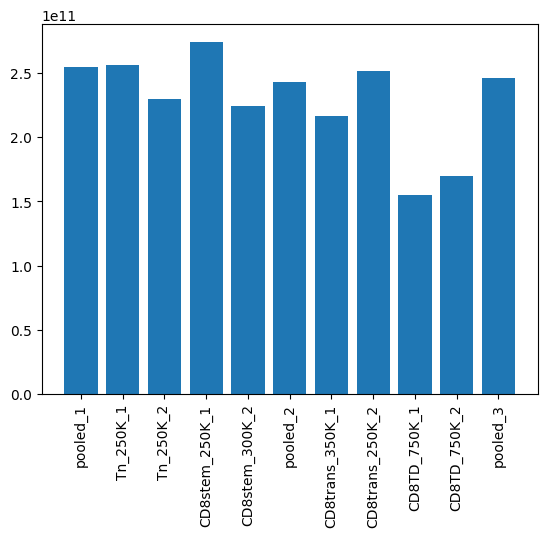

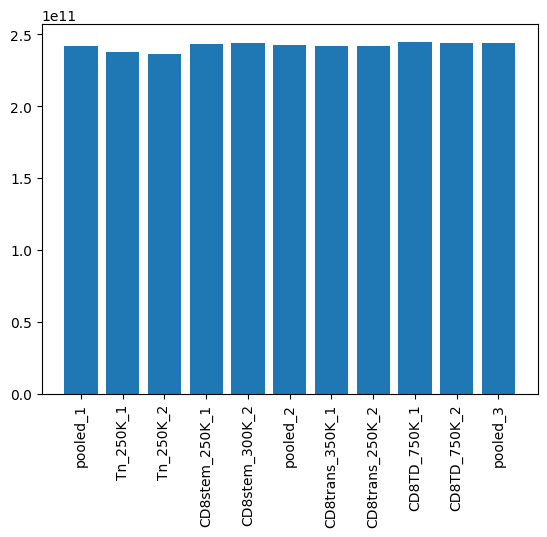

In [88]:
bar_plot_TIC(samples_df)
bar_plot_TIC(TICnorm_data_df)

In [89]:
TICnorm_data_df.columns.sort_values()

Index(['CD8TD_750K_1', 'CD8TD_750K_2', 'CD8stem_250K_1', 'CD8stem_300K_2', 'CD8trans_250K_2', 'CD8trans_350K_1', 'Tn_250K_1', 'Tn_250K_2', 'pooled_1', 'pooled_2', 'pooled_3'], dtype='object')

In [90]:
# after TIC normalization, the order becomes less useful, and I would like to see more the biologically meaning ordering
TICnorm_data_df = TICnorm_data_df.loc[:,TICnorm_data_df.columns.sort_values()]

In [91]:
TICnorm_data_df.to_csv(
        os.path.join(output_dir,
                       f"TICnorm_groupFil{group_percNA_threshold}_{mode}_blkM_featab.csv"),index = True) # rename if needed

------

## Summary
- run normalization

------

------

## Imputation with half minimum

##### The following function is only used to assembly the metainfo, I thought this is not anymore useful for the subsequent steps
- id_number	mz	rtime	rtime_left_base	rtime_right_base	parent_masstrack_id	peak_area	cSelectivity	goodness_fitting	snr	detection_counts

In [78]:
# def replace_col_wtTICnorm(feat_df = grp_filt_df,
#                           data_df = TICnorm_data_df):
#     '''
#     replace the same column of feature dataframe (feat_df) with the data_df that have the same column
#     Return the feature dataframe. Note that the function is not limited to TIC normalized data.
#     '''
#     new_feat_df = copy.deepcopy(feat_df)
#     new_feat_df = new_feat_df.loc[data_df.index,:]
#     for col in data_df.columns:
#         new_feat_df[col] = data_df[col]

#     return(new_feat_df)

In [92]:
def imputation(norm_data_df,full_asari_data_df,replace = 'half_minimum'):
    '''
    the row index should be matched btw. normalized data df & full asari df
    The reason to add full_asari_data_df is to add the true minimum across all samples. 
    It will better capture the baseline
    Default setting: if there is 0, then it will automatically deem as NA.
    full_asari_data_df can use the same dataset of norm_data_df
    norm_data_df can be exactly the same with not normalized dataset
    
    Output
    ======
    Return the NA filled norm_data_df
    ''' 
    
    # turn zero to NA
    norm_data_df[norm_data_df == 0] = np.nan
    full_asari_data_df[full_asari_data_df == 0] = np.nan
    
    if replace == 'half_minimum':
        for i,row in norm_data_df.iterrows():
            minimum_value = full_asari_data_df.loc[i,:].min()
            row.fillna(minimum_value/2,inplace = True) # imputation is minimum

    return(norm_data_df)

In [93]:
# data_df contains all the samples columns including pooled blank and etc.
grp_filt_df.columns

Index(['Blank_1', 'Blank_2', 'Blank_std_1', 'Qstd_1', 'Qstd_2', 'pooled_1', 'Tn_250K_1', 'Tn_250K_2', 'CD8stem_250K_1', 'CD8stem_300K_2', 'pooled_2', 'CD8trans_350K_1', 'CD8trans_250K_2', 'CD8TD_750K_1', 'CD8TD_750K_2', 'pooled_3', 'Qstd_3', 'Blank_3', 'Klof2_1', 'Klof2_2', 'Klof2_3'], dtype='object')

In [94]:
# samples_df contains only relevant columns & after TIC normalization
TICnorm_data_df.columns

Index(['CD8TD_750K_1', 'CD8TD_750K_2', 'CD8stem_250K_1', 'CD8stem_300K_2', 'CD8trans_250K_2', 'CD8trans_350K_1', 'Tn_250K_1', 'Tn_250K_2', 'pooled_1', 'pooled_2', 'pooled_3'], dtype='object')

In [95]:
# Make sure they both point to Feature ID
print(grp_filt_df.index[0:5])
print(TICnorm_data_df.index[0:5])

Index(['F3', 'F5', 'F6', 'F7', 'F9'], dtype='object')
Index(['F3', 'F5', 'F6', 'F7', 'F9'], dtype='object')


In [96]:
data_df_imphMin = imputation(norm_data_df = TICnorm_data_df,
                                       full_asari_data_df = grp_filt_df,
                                       replace = 'half_minimum')

data_df_imphMin.to_csv(
        os.path.join(output_dir,
                       f"hMinImp_TICn_groupFil{group_percNA_threshold}_{mode}_blkM_featab.csv"),index = True)

In [97]:
data_df_imphMin.head()

,CD8TD_750K_1,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2,pooled_1,pooled_2,pooled_3
F3,3.925627e+06,2.764136e+06,3.761470e+06,2.480960e+06,1.651622e+06,3.896304e+06,1.064190e+06,9.574390e+05,3.116664e+06,3153499.0,3.127431e+06
F5,2.074735e+05,2.074735e+05,3.685037e+05,2.074735e+05,1.856975e+06,2.074735e+05,1.433644e+06,1.032423e+06,2.074735e+05,207473.5,2.074735e+05
F6,1.456450e+05,1.456450e+05,3.623920e+05,3.172343e+05,1.456450e+05,3.588857e+05,3.415444e+05,1.456450e+05,1.456450e+05,145645.0,1.456450e+05
F7,1.526970e+05,1.526970e+05,3.709788e+05,3.588835e+05,1.526970e+05,3.407542e+05,3.646677e+05,1.526970e+05,1.526970e+05,152697.0,1.526970e+05
F9,9.586055e+05,9.586055e+05,3.031591e+06,3.014511e+06,2.924442e+06,2.857158e+06,2.610983e+06,3.123408e+06,2.391043e+06,1917211.0,2.040713e+06


# log2 transform

In [98]:
def log2transform(data_df,
                  back2Zero = False):
    data_df[data_df == 0] = np.nan
    data_df_log = data_df.apply(lambda x: np.log2(x)) # no need to add +1
    if back2Zero == True:
        data_df_log[data_df_log.isna()] = 0
    return(data_df_log)

In [99]:
# def log2transform_on_featab_wtRegExpr(feat_df,
#                                       back2Zero = False,
#                                       samplesRegExpr = 'Tn\\_[0-9]+|CD8stem\\_[0-9]+|CD8trans\\_[0-9]+|CD8TD\\_[0-9]|pooled|Qstd|Blank'):
#     data_df = select_column_regExpr(feat_df,samplesRegExpr)
#     log2_data_df = log2transform(data_df, back2Zero = back2Zero)
#     log2_feat_df = replace_col_wtTICnorm(feat_df = feat_df,
#                                          data_df = log2_data_df)
#     return(log2_feat_df)

#### log2 transform on the imputated feature tables

In [100]:
log2_imphMin_data_df = log2transform(data_df_imphMin)

In [101]:
log2_imphMin_data_df.head()

,CD8TD_750K_1,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2,pooled_1,pooled_2,pooled_3
F3,21.904492,21.398397,21.842865,21.242467,20.655452,21.893675,20.021325,19.868821,21.571571,21.588522,21.576547
F5,17.662568,17.662568,18.491320,17.662568,20.824523,17.662568,20.451255,19.977603,17.662568,17.662568,17.662568
F6,17.152097,17.152097,18.467192,18.275189,17.152097,18.453165,18.381714,17.152097,17.152097,17.152097,17.152097
F7,17.220312,17.220312,18.500977,18.453156,17.220312,18.378372,18.476223,17.220312,17.220312,17.220312,17.220312
F9,19.870578,19.870578,21.531644,21.523493,21.479730,21.446149,21.316162,21.574690,21.189208,20.870578,20.960642


In [102]:
log2_imphMin_data_df.to_csv(
        os.path.join(output_dir,
                       f"log2_hMinImp_TICn_groupFil{group_percNA_threshold}_{mode}_blkM_featab.csv"),index = True)

-------

-----

-----

## Report geometric mean of group

## the end index is `12`

In [103]:
log2_imphMin_data_df.columns[0:]

Index(['CD8TD_750K_1', 'CD8TD_750K_2', 'CD8stem_250K_1', 'CD8stem_300K_2', 'CD8trans_250K_2', 'CD8trans_350K_1', 'Tn_250K_1', 'Tn_250K_2', 'pooled_1', 'pooled_2', 'pooled_3'], dtype='object')

In [104]:
from itertools import combinations

def log2FCreport(log2_feat_df, 
          groupRegExprs = ['Tn\\_[0-9]+','CD8stem\\_[0-9]+','CD8trans\\_[0-9]+','CD8TD\\_[0-9]+'], # order always the reference on the left
          end_index = 12):
    '''
    The function require log2 feature table
    Using groupRegExprs to recognize the grouped samples. Only works for explicitly coded sample identification based on the name
    End_index is where the index end on the meta information coded in the log2_feature table
    Currently only deals with two group comparison
    '''
    #' separate data table and metainfo by `end_index` (needs to define beforehand)
    data_df = log2_feat_df.iloc[:,end_index:log2_feat_df.shape[1]]
    log2_feat_df_meta = log2_feat_df.iloc[:,0:end_index]
    
    # calculate gMean first
    group_of_mean_dict = {}
    for group in groupRegExprs:
        group_df = select_column_regExpr(log2_feat_df,group)
        group_df_mean = group_df.apply(lambda row: row.mean(),axis = 1)
        group_id = group.split('\\')[0]
        log2_feat_df_meta[f'gMean_{group_id}'] = group_df_mean
        group_of_mean_dict.update({group_id : group_df_mean})
    
    # calculate log2 fold change  using `group_of_mean_dict`
    combos = list(combinations(group_of_mean_dict.keys(), 2))
    for combo in combos:
        log2_feat_df_meta[f'log2FC_{combo[1]}vs{combo[0]}'] = [y - x for (x,y) in zip(group_of_mean_dict[combo[0]],
                                                                                           group_of_mean_dict[combo[1]])]
    final_df = pd.concat([log2_feat_df_meta,data_df],axis = 1)
    return(final_df)

### **Imputated** TICnorm log2 data : report gMean

In [105]:
FC_log2_TICnorm_imphMin_feat_df = log2FCreport(log2_feat_df = log2_imphMin_data_df,
                                      end_index = 0)

FC_log2_TICnorm_imphMin_feat_df.to_csv(
        os.path.join(output_dir,
                       f"FC_log2_hMinImp_TICn_groupFil{group_percNA_threshold}_{mode}_blkM_featab.csv"),index = True)

-------

-------